In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.axes_grid1 import make_axes_locatable

df = pd.read_csv(r'rankings.csv')
dfgeo = gpd.read_file(r'rankings.csv')

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#Convert gpd to pd in order to drop column
worldPanda = pd.DataFrame(world)

#Drop unnecessary columns
worldPanda = worldPanda.drop(['pop_est', 'continent', 'iso_a3', 'gdp_md_est'],axis=1)
worldPanda.head()

,name,geometry
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [3]:
#merge geometry column based on name
df = pd.merge(df, worldPanda, left_on='Country', right_on='name', how="outer")
gdf = gpd.GeoDataFrame(df, geometry='geometry')
# Remove Artarctica 
gdf= gdf[gdf.name != "Antarctica"]
gdf.head() 


,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,name,geometry
0,1.0,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534,Finland,"POLYGON ((28.59193 69.06478, 28.44594 68.36461..."
1,2.0,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532,Denmark,"MULTIPOLYGON (((9.92191 54.98310, 9.28205 54.8..."
2,3.0,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191,Iceland,"POLYGON ((-14.50870 66.45589, -14.73964 65.808..."
3,4.0,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461,Switzerland,"POLYGON ((9.59423 47.52506, 9.63293 47.34760, ..."
4,5.0,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419,Netherlands,"POLYGON ((6.90514 53.48216, 7.09205 53.14404, ..."


<AxesSubplot:title={'center':'WORLD HAPPINESS SCORE'}>

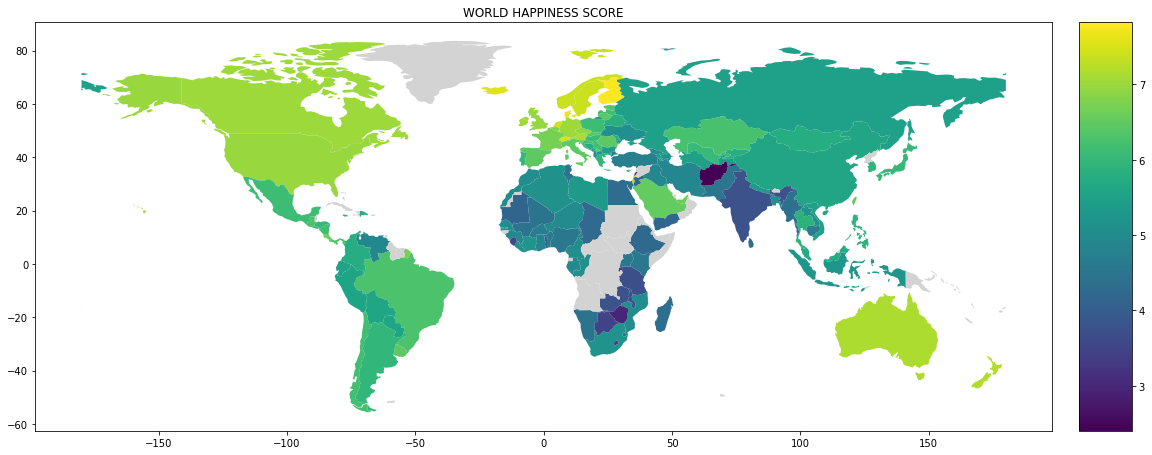

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
divider = make_axes_locatable(ax)
ax.set_title("WORLD HAPPINESS SCORE")

cax = divider.append_axes("right", size="5%", pad=0.1)
gdf.plot(column = 'Happiness score', ax=ax, legend=True, cax=cax, missing_kwds={"color":"lightgrey"})

<AxesSubplot:title={'center':'WORLD HAPPINESS EXPLAINED BY GDP PER CAPITA'}>

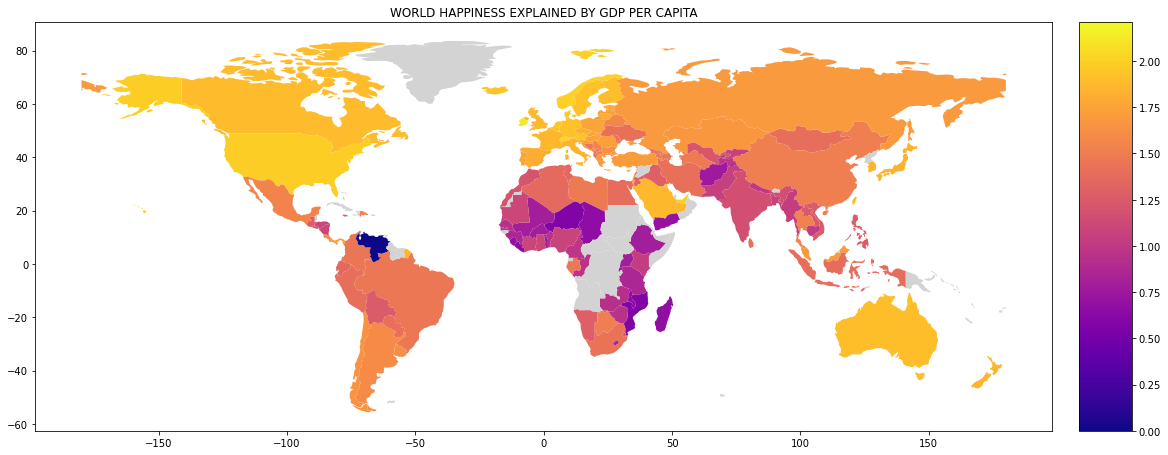

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
divider = make_axes_locatable(ax)
ax.set_title("WORLD HAPPINESS EXPLAINED BY GDP PER CAPITA")
cax = divider.append_axes("right", size="5%", pad=0.1)
gdf.plot(column = 'Explained by: GDP per capita', ax=ax, legend=True, cax=cax, cmap='plasma', missing_kwds={"color":"lightgrey"})

<AxesSubplot:title={'center':'WORLD HAPPINESS EXPLAINED BY FREEDOM TO MAKE LIFE CHOICE'}>

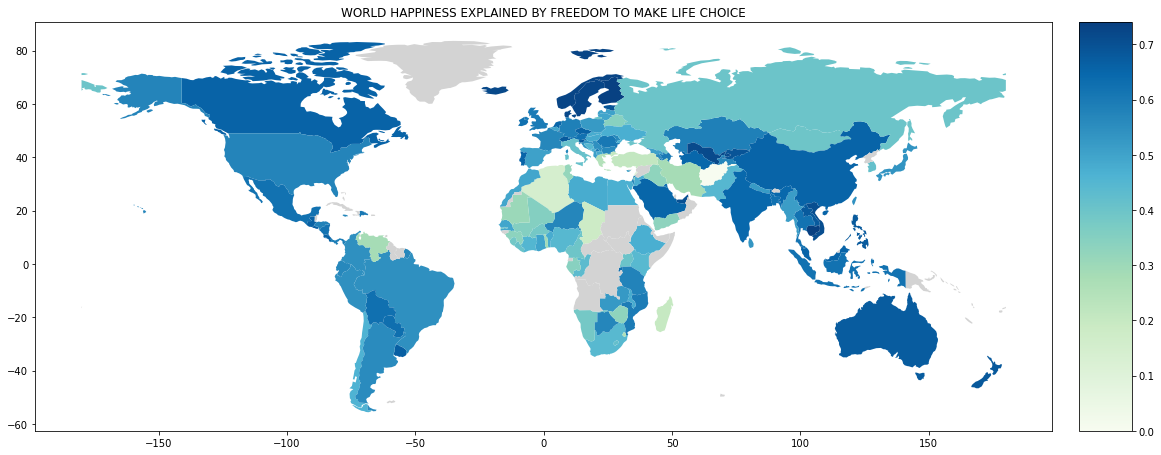

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
divider = make_axes_locatable(ax)
ax.set_title("WORLD HAPPINESS EXPLAINED BY FREEDOM TO MAKE LIFE CHOICE")

cax = divider.append_axes("right", size="5%", pad=0.1)
gdf.plot(column = 'Explained by: Freedom to make life choices', ax=ax, legend=True, cax=cax, cmap='GnBu', missing_kwds={"color":"lightgrey"})

<AxesSubplot:title={'center':'WORLD HAPPINESS EXPLAINED BY SOCIAL SUPPORT'}>

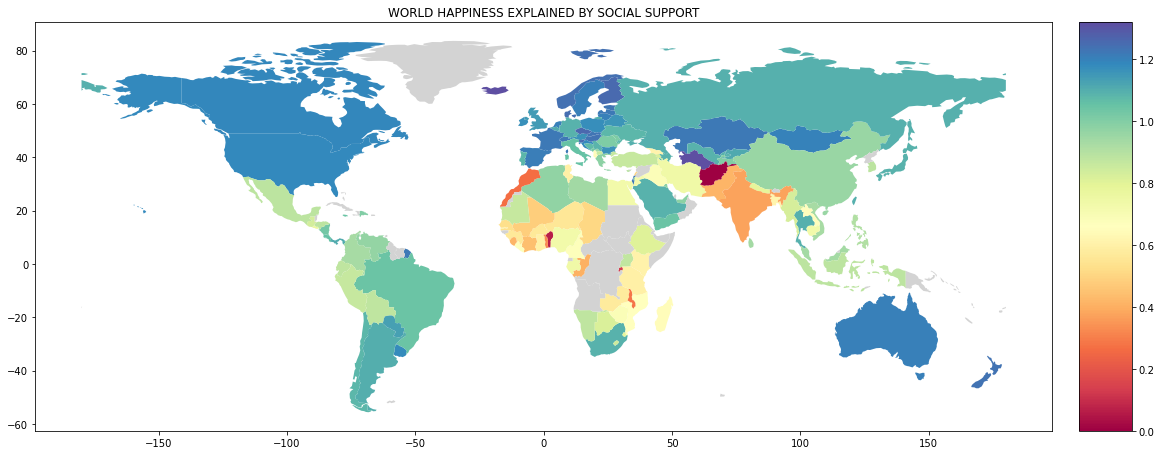

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
divider = make_axes_locatable(ax)
ax.set_title("WORLD HAPPINESS EXPLAINED BY SOCIAL SUPPORT")
cax = divider.append_axes("right", size="5%", pad=0.1)
gdf.plot(column = 'Explained by: Social support', ax=ax, legend=True, cax=cax, cmap='Spectral', missing_kwds={"color":"lightgrey"})
